# Importing libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
import sys
import os

import glob
import argparse
from keras import __version__
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from keras.applications.xception import preprocess_input as xception_preprocess_input
from keras.applications.xception import Xception
from keras.models import *
from keras.layers import *
from keras.activations import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras import optimizers
from keras import callbacks
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.regularizers import l2,l1
import pandas as pd

input_shape = (224,224,3)
nbr_of_classes=38

# Defining Models - ResTS

In [ ]:
#Encoder Start
base_model1 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = input_shape)
x1_0 = base_model1.output
x1_0 = Flatten(name='Flatten1')(x1_0)
dense1 = Dense(256, name='fc1',activation='relu')(x1_0) 
x = classif_out_encoder1 = Dense(38, name='out1', activation = 'softmax')(dense1) # Latent Representation / Bottleneck

#Get Xception's tensors for skip connection.
conv14 = base_model1.get_layer('block14_sepconv2_act').output
conv13 = base_model1.get_layer('block13_sepconv2_bn').output
conv12 = base_model1.get_layer('block12_sepconv3_bn').output
conv11 = base_model1.get_layer('block11_sepconv3_bn').output
conv10 = base_model1.get_layer('block10_sepconv3_bn').output
conv9 = base_model1.get_layer('block9_sepconv3_bn').output
conv8 = base_model1.get_layer('block8_sepconv3_bn').output
conv7 = base_model1.get_layer('block7_sepconv3_bn').output
conv6 = base_model1.get_layer('block6_sepconv3_bn').output
conv5 = base_model1.get_layer('block5_sepconv3_bn').output
conv4 = base_model1.get_layer('block4_sepconv2_bn').output
conv3 = base_model1.get_layer('block3_sepconv2_bn').output
conv2 = base_model1.get_layer('block2_sepconv2_bn').output
conv1 = base_model1.get_layer('block1_conv2_act').output

#Decoder Start
dense2 = Dense(256, activation='relu')(x)

x = Add(name='first_merge')([dense1, dense2])
x = Dense(7*7*2048)(x)
reshape1 = Reshape((7, 7, 2048))(x)

#BLOCK 1
x = SeparableConv2D(2048, (3,3), padding='same', name='block14_start')(reshape1)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv14, x], axis = 3)
x = SeparableConv2D(1536, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = c14 = Activation('relu')(x)

#BLOCK 2
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3,3), padding='same', name='block13_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv13, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c1314 = Conv2D(728, (1,1))(UpSampling2D()(c14))
x = add1 = Add()([c1314, x])

#BLOCK 3
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='blockmiddle_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv12, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add2 = Add()([add1, x])
#BLOCK 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv11, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add3 = Add()([add2, x])
#BLOCK 5
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv10, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add4 = Add()([add3, x])
#BLOCK 6
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv9, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add5 = Add()([add4, x])
#BLOCK 7
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv8, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add6 = Add()([add5, x])
#BLOCK 8
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv7, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add7 = Add()([add6, x])
#BLOCK 9
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv6, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add8 = Add()([add7, x])
#BLOCK 10
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv5, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name ='blockmiddle_end')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add9 = Add()([add8, x])

#BLOCK 11
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='block4_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv4, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c45 = Conv2D(728, (1,1))(UpSampling2D()(add9))
x = add10 = Add()([c45, x])

#BLOCK 12
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='valid', name='block3_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv3, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c34 = Conv2D(256, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add10))
x = add11 = Add()([c34, x])

#BLOCK 13
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='valid', name='block2_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv2, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c23 = Conv2D(128, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add11))
x = add12 = Add()([c23, x])

#BLOCK 14
x = Conv2D(64, (3,3), padding='same', name='block1_start')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv1, x], axis = 3)
x = ZeroPadding2D()(x)
x = Conv2D(32, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D()(x)
x = ZeroPadding2D()(x)

x = Conv2D(2, 3, activation = 'relu', padding = 'same',)(x)
mask = x = Conv2D(3, 1, activation = 'sigmoid',name='Mask')(x)

base_model2 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = (224,224,3))
x2_0 = base_model2(mask)
x2_0 = Flatten(name='Flatten2')(x2_0)
x2_1 = Dense(256, name='fc2',activation='relu')(x2_0) 
classif_out_encoder2  = Dense(nbr_of_classes, name='out2',activation='softmax')(x2_1)

#Create ResTS Model
ResTS = Model(base_model1.input, [classif_out_encoder1, classif_out_encoder2])

#Compile the mode to use multi-task learning
losses = {
        "out1": 'categorical_crossentropy',
        "out2": 'categorical_crossentropy'
        }
alpha=0.4
lossWeights = {"out1": alpha, "out2": (1.0-alpha)}
ResTS.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss=losses, loss_weights=lossWeights, metrics = ['accuracy'])
ResTS.summary()

83689472/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_____________________________

# Defining Models - Teacher/Student



In [ ]:
base_model1 = VGG16(include_top=False, weights='imagenet',input_shape = input_shape)
x1_0 = base_model1.output
x1_0 = Flatten(name='Flatten1')(x1_0)
x1_1 = Dense(256, name='fc1',activation='relu')(x1_0) 
x1_2 = classif_out_encoder1 = Dense(nbr_of_classes, name='out1', activation = 'softmax')(x1_1)  
#Decoder's graph.	
#Get Teacher's tensors for skip connection.
pool5 = base_model1.get_layer('block5_pool').output
conv5 = base_model1.get_layer('block5_conv3').output
conv4 = base_model1.get_layer('block4_conv3').output
conv3 = base_model1.get_layer('block3_conv3').output
conv2 = base_model1.get_layer('block2_conv2').output
conv1 = base_model1.get_layer('block1_conv2').output
#Inverse fully connected Teacher's layers. 
inv_x1_1 = Dense(256, name='inv_x1_1',activation='relu')(x1_2)
merge_x1_1 = Add(name='merge_x1_1')([inv_x1_1,x1_1])
inv_x1_0 = Dense(7*7*512, name='x1_1',activation='relu')(merge_x1_1)
reshaped_inv_x1_0 = Reshape((7, 7,512), name='')(inv_x1_0)
inv_x1_0 = Add(name='merge_x1_0')([reshaped_inv_x1_0,pool5])
#DECONV Block1
up7 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(inv_x1_0))
merge7 = concatenate([conv5,up7], axis = 3)
conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
#DECONV Block2
up8 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv4,up8], axis = 3)
conv8 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
#DECONV Block13
up9 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv3,up9], axis = 3)
conv9 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
#DECONV Block14
up10 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv9))
merge10 = concatenate([conv2,up10], axis = 3)
conv10 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge10)
conv10 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv10)
#DECONVBlock15
up11 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv10))
merge11 = concatenate([conv1,up11], axis = 3)
conv11 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge11)
conv11 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv11)
#Reconstructed image refinement
conv11 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv11)
mask = conv11 = Conv2D(3, 1, activation = 'sigmoid',name='Mask')(conv11)

#Graphe of Student
base_model2 = VGG16(include_top=False, weights='imagenet',input_shape = (224,224,3))
x2_0 = base_model2(mask)
x2_0 = Flatten(name='Flatten2')(x2_0)
x2_1 = Dense(256, name='fc2',activation='relu')(x2_0) 
classif_out_encoder2  = Dense(nbr_of_classes, name='out2',activation='softmax')(x2_1)

#Get Teacher/Student Model
TeacherStudent = Model(base_model1.input, [classif_out_encoder1,classif_out_encoder2])

#Compile the mode to use multi-task learning
losses = {
        "out1": 'categorical_crossentropy',
        "out2": 'categorical_crossentropy'
        }
alpha=0.4
lossWeights = {"out1": alpha, "out2": (1.0-alpha)}
TeacherStudent.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss=losses, loss_weights=lossWeights,metrics = ['accuracy'])
TeacherStudent.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
___________________________

# Testing

# Testing ResTS and TeacherStudent

In [ ]:
ResTS.load_weights('/model/ResTS.h5')
TeacherStudent.load_weights('/model/TeacherStudent.h5')

In [ ]:
  import tensorflow as tf
  import keras_preprocessing
  from keras_preprocessing import image
  from keras_preprocessing.image import ImageDataGenerator
  import shutil
  
  TEST_DIR = "/content/test"
  
  test_datagen = ImageDataGenerator(preprocessing_function=xception_preprocess_input)

  test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224,224),
    class_mode='categorical',
    shuffle = False,
    batch_size= 16
  )

Found 2719 images belonging to 38 classes.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
Y_pred, x = ResTS.predict(test_generator, 2719 // 16+1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [str(i) for i in os.listdir('/content/test')]
print("F1 Score: " + str(f1_score(test_generator.classes, y_pred, average='weighted')))

F1 Score: 0.9908363047573029


0.9952891260814745

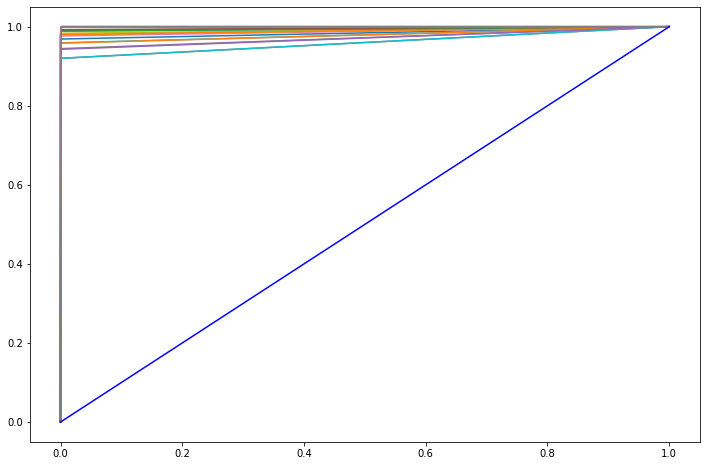

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names): # all_labels: no of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(test_generator.classes, y_pred)

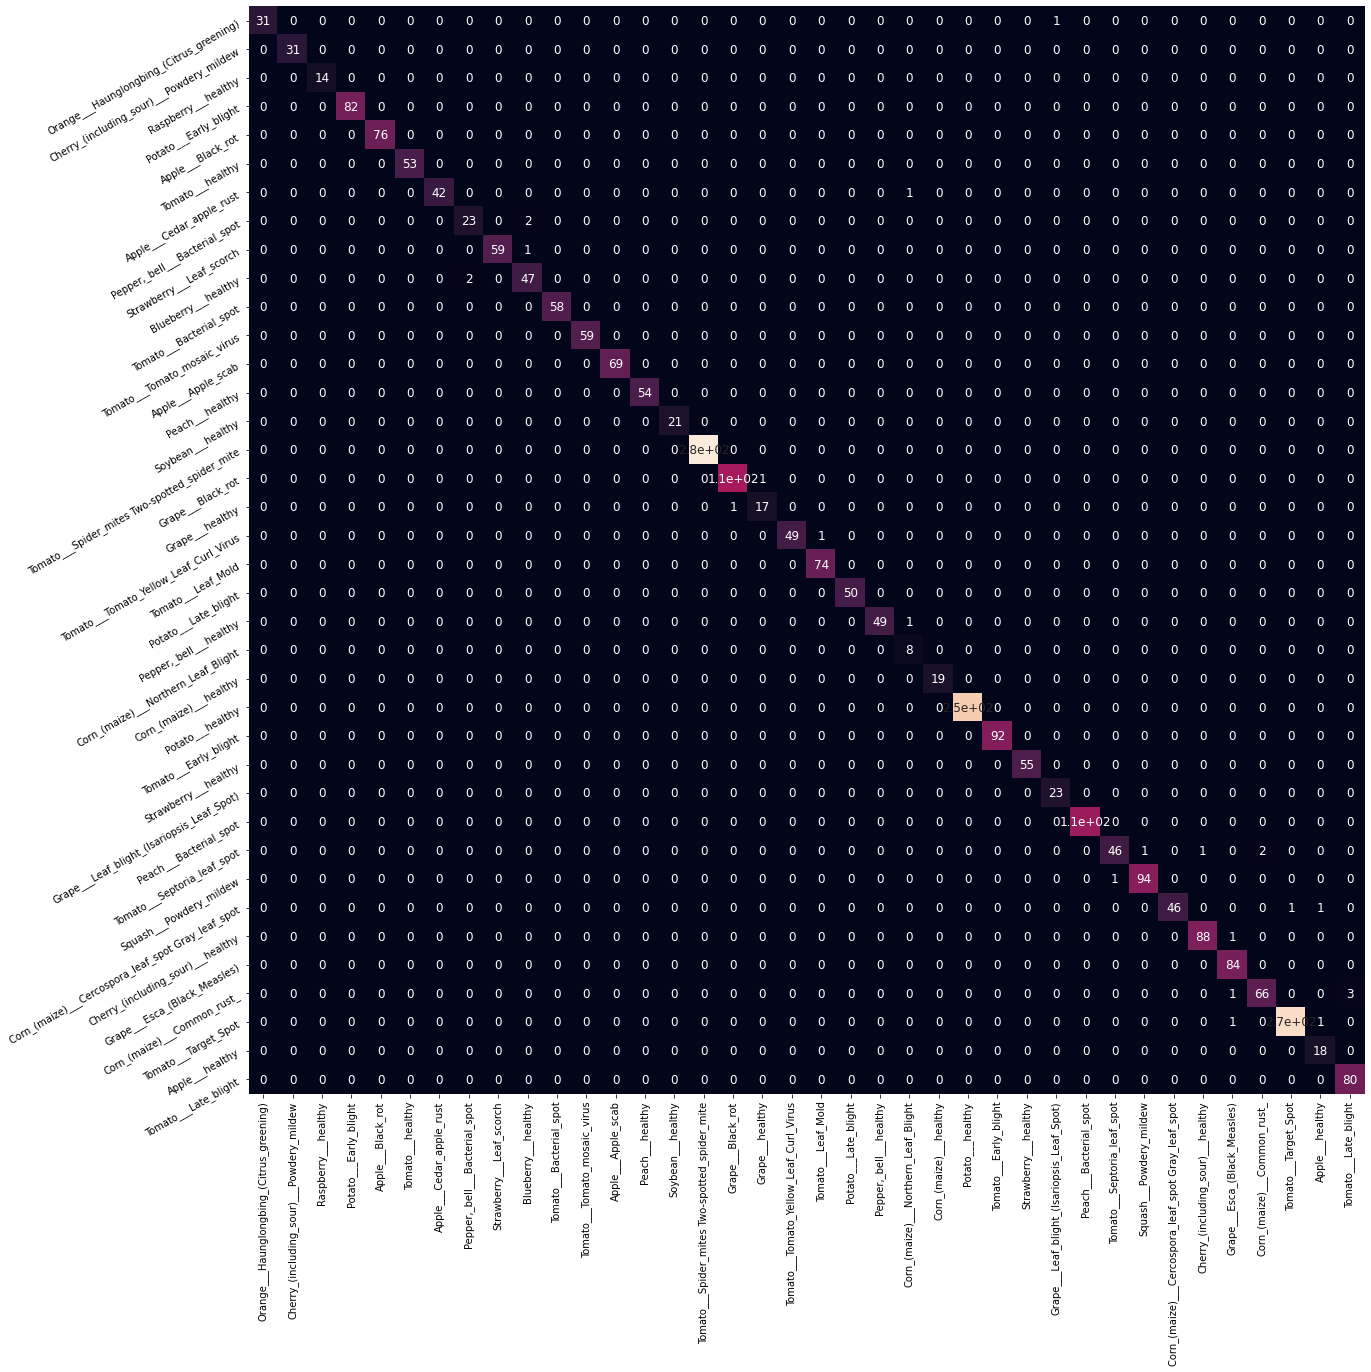

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
lbl = list(range(38))
df_cm = pd.DataFrame(confusion_matrix(test_generator.classes, y_pred, labels=lbl), 
                     target_names, target_names)

plt.figure(figsize=(20,20))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False,  cbar_kws={"orientation": "horizontal"})
plt.yticks(rotation=30) 
#plt.savefig('/content/confusionmatrix.png')
plt.show()

In [ ]:
cm1 = confusion_matrix(test_generator.classes, y_pred, labels=lbl)
total1=sum(sum(cm1))
accuracy1 = 0
for l in lbl:
  accuracy1+=cm1[l,l]/total1

print ('Accuracy : ', accuracy1)

Accuracy :  0.990805443177639


In [ ]:
cnf_matrix = confusion_matrix(test_generator.classes, y_pred, labels=lbl)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

# Testing Teacher/Student

In [ ]:
  import tensorflow as tf
  import keras_preprocessing
  from keras_preprocessing import image
  from keras_preprocessing.image import ImageDataGenerator
  import shutil
  
  TEST_DIR = "/content/test"
  
  test_datagen = ImageDataGenerator(preprocessing_function=vgg16_preprocess_input)

  test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224,224),
    class_mode='categorical',
    shuffle = False,
    batch_size= 16
  )

Found 2719 images belonging to 38 classes.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
Y_pred, x = TeacherStudent.predict(test_generator, 2719 // 16+1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [str(i) for i in os.listdir('/content/test')]
print("F1 Score: " + str(f1_score(test_generator.classes, y_pred, average='weighted')))

F1 Score: 0.9725287592480388


0.9858300588730275

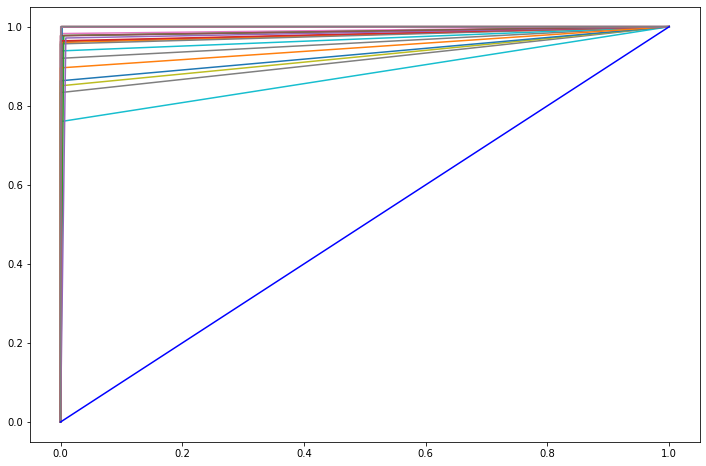

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names): # all_labels: no of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(test_generator.classes, y_pred)

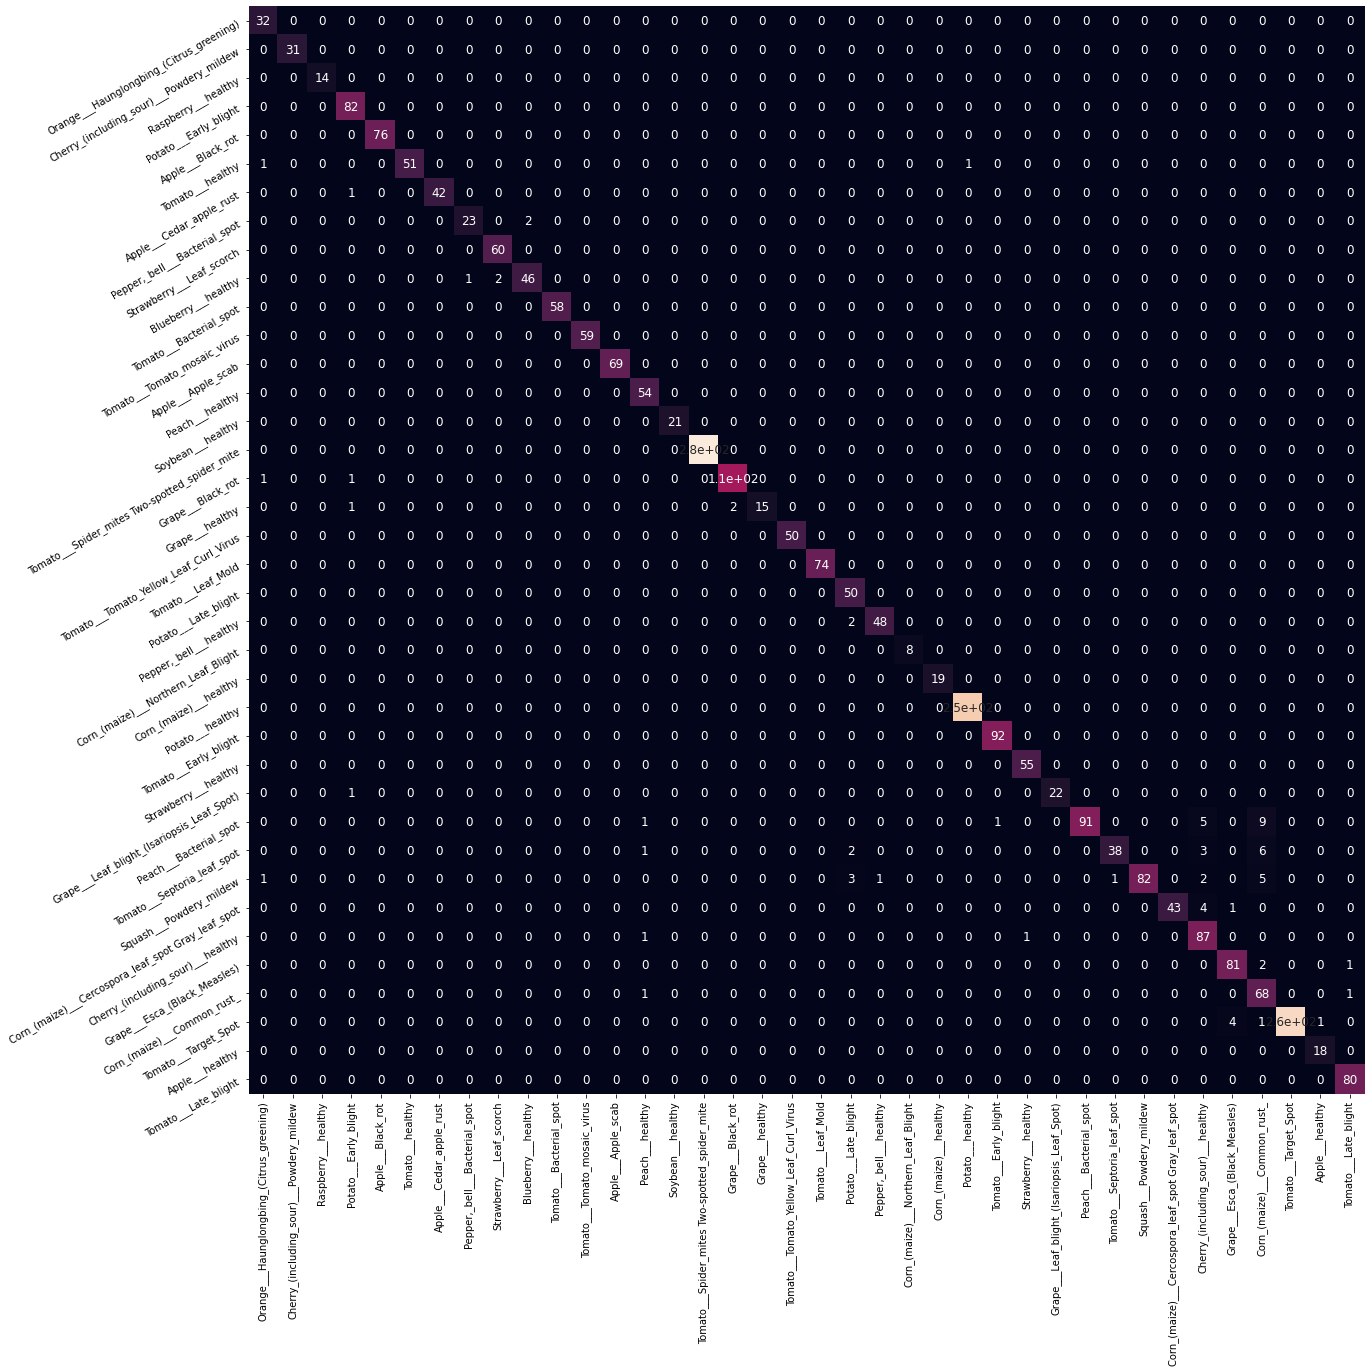

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
lbl = list(range(38))
df_cm = pd.DataFrame(confusion_matrix(test_generator.classes, y_pred, labels=lbl), 
                     target_names, target_names)

plt.figure(figsize=(20,20))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False,  cbar_kws={"orientation": "horizontal"})
plt.yticks(rotation=30) 
plt.savefig('/content/confusionmatrix2.png')
plt.show()

In [ ]:
cm1 = confusion_matrix(test_generator.classes, y_pred, labels=lbl)
total1=sum(sum(cm1))
accuracy1 = 0
for l in lbl:
  accuracy1+=cm1[l,l]/total1

print ('Accuracy : ', accuracy1)

Accuracy :  0.9724163295329165


In [ ]:
cnf_matrix = confusion_matrix(test_generator.classes, y_pred, labels=lbl)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

# Visualizing the results

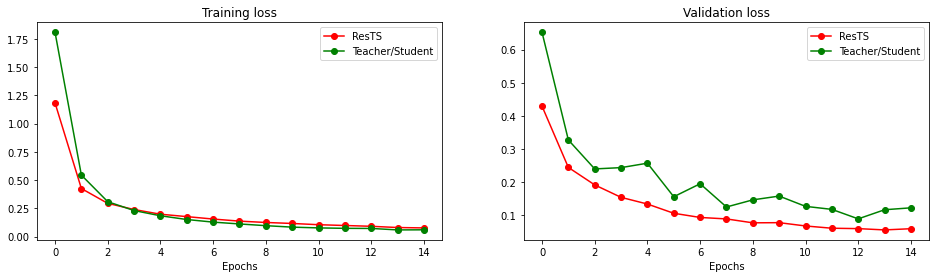

In [ ]:
import pandas as pd
import matplotlib.font_manager as font_manager
df = pd.read_csv('/ResTS.csv')
df2 = pd.read_csv('/TeacherStudent.csv')
%matplotlib inline
import matplotlib.pyplot as plt

#Xception
out1_loss = df['out1_loss']
val_out1_loss = df['val_out1_loss']
loss = df['loss']
val_loss = df['val_loss']
out2_loss = df['out2_loss']
val_out2_loss = df['val_out2_loss']
out1_accuracy = df['out1_accuracy']
val_out1_accuracy = df['val_out1_accuracy']
out2_accuracy = df['out2_accuracy']
val_out2_accuracy = df['val_out2_accuracy']
epochs = range(len(loss))

#TS
out1_loss2 = df2['out1_loss']
val_out1_loss2 = df2['val_out1_loss']
loss2 = df2['loss']
val_loss2 = df2['val_loss']
out2_loss2 = df2['out2_loss']
val_out2_loss2 = df2['val_out2_loss']
out1_accuracy2 = df2['out1_accuracy']
val_out1_accuracy2 = df2['val_out1_accuracy']
out2_accuracy2 = df2['out2_accuracy']
val_out2_accuracy2 = df2['val_out2_accuracy']
epochs2 = range(len(loss2))

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label='ResTS', marker='o')
plt.plot(epochs2, loss2, 'g', label='Teacher/Student', marker='o')
plt.xlabel('Epochs')
plt.title('Training loss')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, val_loss, 'r', label='ResTS', marker='o')
plt.plot(epochs2, val_loss2, 'g', label='Teacher/Student', marker='o')
plt.xlabel('Epochs')
plt.title('Validation loss')
plt.legend(loc=0)
plt.savefig('ResTSvsTSline.png', dpi=300, bbox_inches='tight')
plt.show()

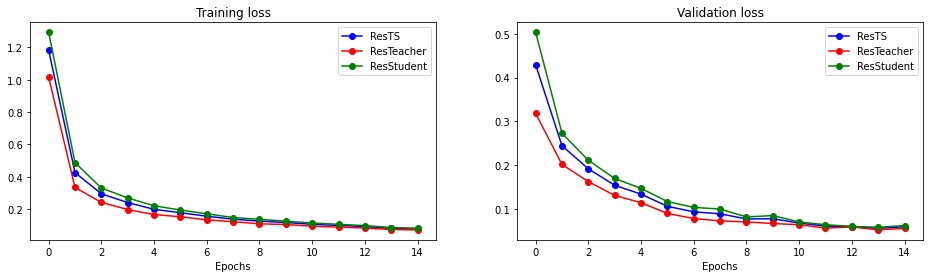

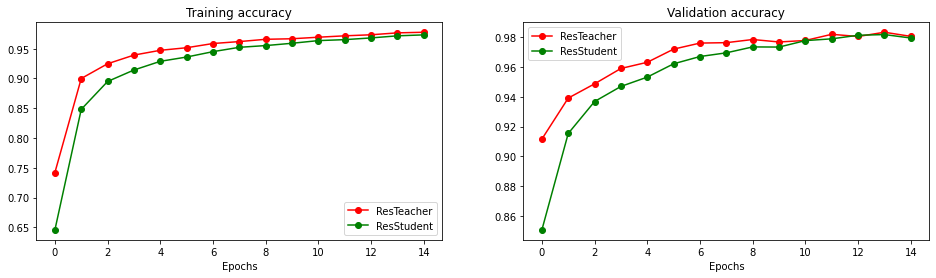

In [ ]:
import pandas as pd
import matplotlib.font_manager as font_manager
df = pd.read_csv('/ResTS.csv')
df2 = pd.read_csv('/TeacherStudent.csv')
%matplotlib inline
import matplotlib.pyplot as plt

#Xception
out1_loss = df['out1_loss']
val_out1_loss = df['val_out1_loss']
loss = df['loss']
val_loss = df['val_loss']
out2_loss = df['out2_loss']
val_out2_loss = df['val_out2_loss']
out1_accuracy = df['out1_accuracy']
val_out1_accuracy = df['val_out1_accuracy']
out2_accuracy = df['out2_accuracy']
val_out2_accuracy = df['val_out2_accuracy']
epochs = range(len(loss))

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='ResTS', marker='o')
plt.plot(epochs, out1_loss, 'r', label='ResTeacher', marker='o')
plt.plot(epochs, out2_loss, 'g', label='ResStudent', marker='o')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, val_loss, 'b', label='ResTS', marker='o')
plt.plot(epochs, val_out1_loss, 'r', label='ResTeacher', marker='o')
plt.plot(epochs, val_out2_loss, 'g', label='ResStudent', marker='o')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.legend(loc=0)
plt.savefig('loss.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs, out1_accuracy, 'r', label='ResTeacher', marker='o')
plt.plot(epochs, out2_accuracy, 'g', label='ResStudent', marker='o')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, val_out1_accuracy, 'r', label='ResTeacher', marker='o')
plt.plot(epochs, val_out2_accuracy, 'g', label='ResStudent', marker='o')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.legend(loc=0)
plt.savefig('acc.png', dpi=300, bbox_inches='tight')
plt.show()